SUDHIKSHA 24BAD117 - EXPERIMENT 4

13.02.2026 \
Probabilistic Classification using Naïve Bayes
(Gaussian & Multinomial Naïve Bayes)


# **Scenario 1 - MULTINOMIAL NAÏVE BAYES**

The SMS Spam dataset contains text messages that are already labeled as Spam or Ham.

Input Feature: SMS text message \
Target Variable: Message label (Spam or Ham)

This experiment uses the Multinomial Naïve Bayes algorithm, which is suitable for text data based on word frequencies.The SMS messages are cleaned, converted into numerical features using Count Vectorization or TF-IDF, and divided into training and testing data.
The trained model predicts whether a message is spam or ham.

=== Evaluation Metrics ===
Accuracy : 0.968609865470852
Precision: 1.0
Recall   : 0.7666666666666667
F1 Score : 0.8679245283018868

Classification Report:

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       1.00      0.77      0.87       150

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.93      1115
weighted avg       0.97      0.97      0.97      1115


=== Misclassified Messages ===
Message : Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
Actual  : spam
Predicted: ham
--------------------------------------------------
Message : K tell me anything about you.
Actual  : spam
Predicted: ham
--------------------------------------------------
Message : Gud mrng dear hav a nice day
Actual  : spam
Predicted: ham
------------------------------------------------

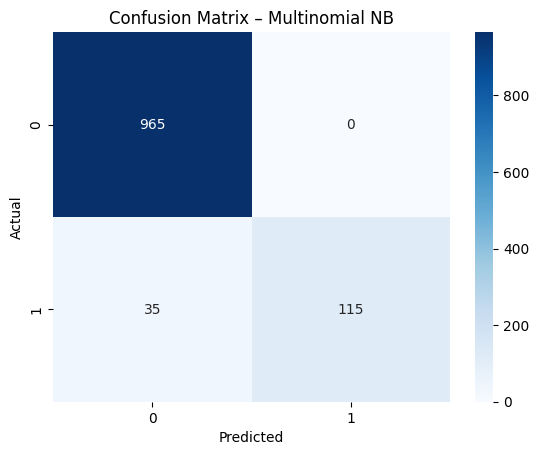

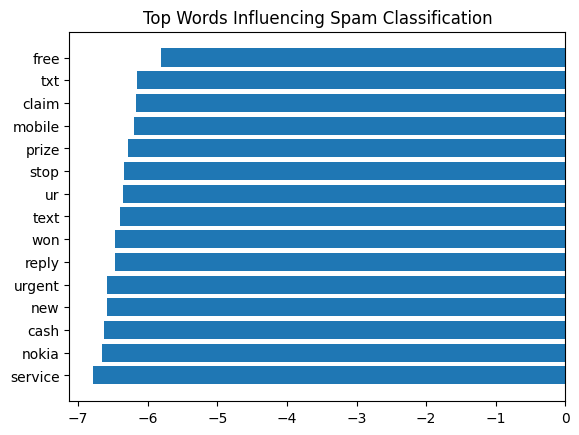

In [3]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report


df = pd.read_csv("spam.csv", encoding="latin-1")[["v1", "v2"]]
df.columns = ["label", "message"]
def clean_text(text):
    text = text.lower()
    text = re.sub(r"[^a-z\s]", "", text)
    return text

df["clean_msg"] = df["message"].apply(clean_text)

vectorizer = TfidfVectorizer(stop_words="english")
X = vectorizer.fit_transform(df["clean_msg"])

le = LabelEncoder()
y = le.fit_transform(df["label"])  # ham=0, spam=1

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


model = MultinomialNB(alpha=1.0)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("=== Evaluation Metrics ===")
print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall   :", recall_score(y_test, y_pred))
print("F1 Score :", f1_score(y_test, y_pred))

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

print("\n=== Misclassified Messages ===")
misclassified = np.where(y_test != y_pred)[0][:10]

for i in misclassified:
    print("Message :", df.iloc[i]["message"])
    print("Actual  :", le.inverse_transform([y_test[i]])[0])
    print("Predicted:", le.inverse_transform([y_pred[i]])[0])
    print("-" * 50)

print("\n=== Laplace Smoothing Impact ===")
for alpha in [0.1, 1, 5]:
    temp_model = MultinomialNB(alpha=alpha)
    temp_model.fit(X_train, y_train)
    pred = temp_model.predict(X_test)
    print(f"Alpha={alpha} → Accuracy={accuracy_score(y_test, pred):.4f}")

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix – Multinomial NB")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

feature_names = vectorizer.get_feature_names_out()
spam_probs = model.feature_log_prob_[1]

top_indices = np.argsort(spam_probs)[-15:]
top_words = feature_names[top_indices]

plt.barh(top_words, spam_probs[top_indices])
plt.title("Top Words Influencing Spam Classification")
plt.show()

# **SCENARIO 2 – GAUSSIAN NAÏVE BAYES**

The Iris dataset contains flower measurements that are already labeled into different species categories.

Input Features: Sepal length, sepal width, petal length, and petal width \
Target Variable: Flower species

This experiment uses the Gaussian Naïve Bayes algorithm, which is suitable for continuous numerical data that follows a normal distribution.
The feature values are inspected, scaled, and divided into training and testing data.The trained model predicts the species of a flower based on its measurements, and the performance is evaluated using accuracy, precision, recall, and F1-score.


=== Gaussian NB Results ===
Accuracy: 1.0

Classification Report:

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Prediction Comparison (first 10 rows):
   Actual  Predicted
0       1          1
1       0          0
2       2          2
3       1          1
4       1          1
5       0          0
6       1          1
7       2          2
8       1          1
9       1          1

Class Probabilities for first 5 test samples:
[[5.97322611e-090 9.95635768e-001 4.36423247e-003]
 [1.00000000e+000 4.96157683e-014 6.54921950e-021]
 [7.31861098e-290 4.92947289e-012 1.00000000e+000]
 [2.81838335e-094 9.77593560e-001 2.24064404e-002]
 [1.13876385e-105 8.70022604e-

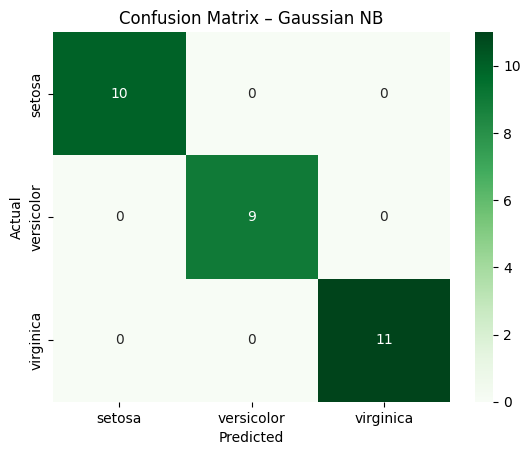

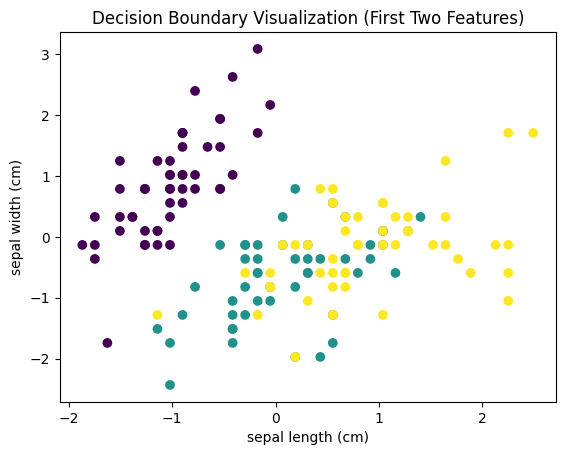

In [2]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
class_names = iris.target_names


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

gnb = GaussianNB()
gnb.fit(X_train, y_train)

y_pred = gnb.predict(X_test)
print("=== Gaussian NB Results ===")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, target_names=class_names))

comparison = pd.DataFrame({"Actual": y_test, "Predicted": y_pred})
print("\nPrediction Comparison (first 10 rows):")
print(comparison.head(10))

print("\nClass Probabilities for first 5 test samples:")
print(gnb.predict_proba(X_test[:5]))

lr = LogisticRegression(max_iter=200)
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

print("\nLogistic Regression Accuracy:", accuracy_score(y_test, lr_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens",
            xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix – Gaussian NB")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

X2 = X_scaled[:, :2]

X_train2, X_test2, y_train2, y_test2 = train_test_split(
    X2, y, test_size=0.2, random_state=42
)

model2 = GaussianNB()
model2.fit(X_train2, y_train2)

plt.scatter(X2[:, 0], X2[:, 1], c=y, cmap="viridis")
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.title("Decision Boundary Visualization (First Two Features)")
plt.show()